# Singular Value Decomposition in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes any $m \times n$ matrix into three matrices, revealing its geometric and algebraic structure. SVD is fundamental in AI/ML for dimensionality reduction, data compression, and feature extraction, enabling efficient representation of data in lower-dimensional spaces while preserving key information.

**Mathematical Definition**:
- For any $m \times n$ matrix $\mathbf{A}$ (real or complex), SVD decomposes it as:
  $$
  \mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
  $$
  where:
  - $\mathbf{U}$: $m \times m$ orthogonal matrix (columns are orthonormal eigenvectors of $\mathbf{A} \mathbf{A}^T$).
  - $\mathbf{\Sigma}$: $m \times n$ diagonal matrix with non-negative singular values $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0$, where $r = \min(m, n)$.
  - $\mathbf{V}$: $n \times n$ orthogonal matrix (columns are orthonormal eigenvectors of $\mathbf{A}^T \mathbf{A}$).
- Singular values $\sigma_i$ are the square roots of the non-zero eigenvalues of $\mathbf{A}^T \mathbf{A}$ (or $\mathbf{A} \mathbf{A}^T$).

**Geometric Interpretation**: SVD represents $\mathbf{A}$ as a composition of rotations/scalings ($\mathbf{U}$, $\mathbf{V}^T$) and a diagonal scaling ($\mathbf{\Sigma}$), mapping vectors from one space to another while preserving structural properties.

**Examples**:
- For $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, SVD yields $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^T$, where $\mathbf{\Sigma}$ contains singular values indicating dimensional importance.
- In ML, SVD compresses high-dimensional data (e.g., images) by retaining dominant singular values.

**Relevance in Mathematics**:
- **Matrix Factorization**: Decomposes matrices into interpretable components.
- **Rank Analysis**: Determines the effective rank via non-zero singular values.
- **Geometric Insights**: Reveals principal directions and scaling factors.
- **Numerical Stability**: Provides robust decompositions for ill-conditioned matrices.

**Relevance in AI/ML**:
- **Dimensionality Reduction**: Projects data to lower-dimensional subspaces.
- **Data Compression**: Reduces storage and computational costs.
- **Feature Extraction**: Uncovers latent structures (e.g., topics, factors).
- **Noise Handling**: Filters noise by focusing on dominant singular values.

**Applications Overview**:
- **PCA**: Decomposes data to find principal components.
- **Recommendation Systems**: Extracts latent factors from user-item matrices.
- **Image Compression**: Approximates images with fewer components.
- **Latent Semantic Analysis (LSA)**: Uncovers topics in text data.
- **Matrix Completion**: Reconstructs missing entries.
- **Spectral Clustering**: Projects data onto low-dimensional subspaces.

## Core Concepts and Derivations
This section covers SVD components, truncated SVD, Frobenius norm, and its relationship to eigenvalue decomposition, with derivations, examples, and visualizations.

### 2.1 Components of SVD
**Definition**:
- **Left Singular Vectors ($\mathbf{U}$)**: Orthonormal eigenvectors of $\mathbf{A} \mathbf{A}^T$, representing output space directions.
- **Singular Values ($\mathbf{\Sigma}$)**: Non-negative values on the diagonal, indicating scaling factors.
- **Right Singular Vectors ($\mathbf{V}$)**: Orthonormal eigenvectors of $\mathbf{A}^T \mathbf{A}$, representing input space directions.

**Explanation**: SVD decomposes a matrix into orthogonal transformations and scalings, providing a structured view of data transformations.

**Derivation**:
- For $\mathbf{A}^T \mathbf{A}$, compute eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$. Singular values are $\sigma_i = \sqrt{\lambda_i}$, and $\mathbf{V} = [\mathbf{v}_1, \dots, \mathbf{v}_n]$.
- Similarly, for $\mathbf{A} \mathbf{A}^T$, eigenvectors form $\mathbf{U}$.
- $\mathbf{\Sigma}$ contains $\sigma_i$ on the diagonal, zero elsewhere.

**Properties**:
- **Orthogonality**: $\mathbf{U}^T \mathbf{U} = \mathbf{I}$, $\mathbf{V}^T \mathbf{V} = \mathbf{I}$.
- **Singular Values**: Ordered $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0$, where $r = \text{rank}(\mathbf{A})$.
- **Uniqueness**: Singular values are unique; singular vectors may not be for repeated $\sigma_i$.

**Why Necessary**:
- Reveals matrix rank and principal directions.
- Simplifies computations with orthonormal bases.
- Enables feature extraction and compression.

**Example**: Decompose $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ using SVD.

**ML Use-Case**: PCA uses SVD to compute principal components.

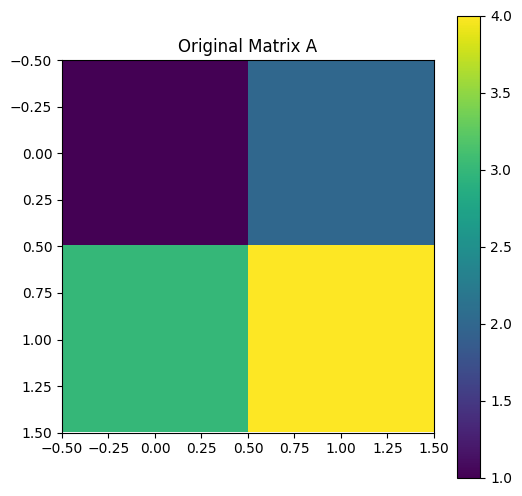

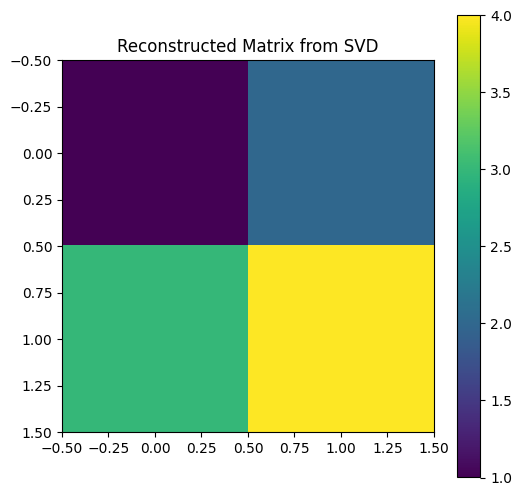

U:
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
Singular values: [5.4649857  0.36596619]
V^T:
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]
Reconstructed A:
 [[1. 2.]
 [3. 4.]]


In [1]:
# SVD Example
import numpy as np

# Define matrix
A = np.array([[1, 2], [3, 4]])

# Compute SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

# Reconstruct matrix
Sigma_mat = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
A_reconstructed = U @ Sigma_mat @ Vt

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.title('Original Matrix A')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(A_reconstructed, cmap='viridis', interpolation='nearest')
plt.title('Reconstructed Matrix from SVD')
plt.colorbar()
plt.show()

print('U:\n', U)
print('Singular values:', Sigma)
print('V^T:\n', Vt)
print('Reconstructed A:\n', A_reconstructed.round(2))

**Visualization Explanation**: The plots show the original matrix $\mathbf{A}$ and its reconstruction from SVD, demonstrating that $\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$ perfectly reconstructs $\mathbf{A}$.

### 2.2 Truncated SVD
**Definition**: Truncated SVD retains the top $k$ singular values and vectors: $\mathbf{A} \approx \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T$, where $\mathbf{U}_k$ is $m \times k$, $\mathbf{\Sigma}_k$ is $k \times k$, and $\mathbf{V}_k$ is $n \times k$.

**Explanation**: Truncated SVD approximates $\mathbf{A}$ with a low-rank matrix, reducing dimensionality while preserving dominant features.

**Derivation**: Minimize the Frobenius norm $\|\mathbf{A} - \mathbf{A}_k\|_F$ among rank-$k$ matrices. The Eckart-Young-Mirsky theorem proves that truncated SVD is optimal.

**Properties**:
- **Low-Rank Approximation**: Minimizes $\|\mathbf{A} - \mathbf{A}_k\|_F$.
- **Efficiency**: Reduces storage and computation for large matrices.

**Why Necessary**:
- Reduces dimensionality for high-dimensional datasets.
- Filters noise by discarding small singular values.

**Example**: Approximate a $2 \times 3$ matrix with $k=1$.

**ML Use-Case**: Image compression using truncated SVD.

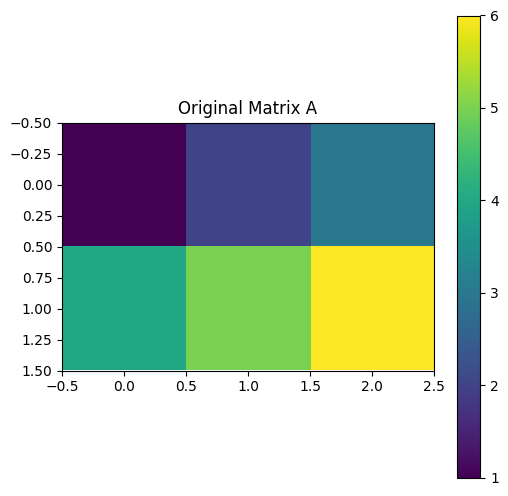

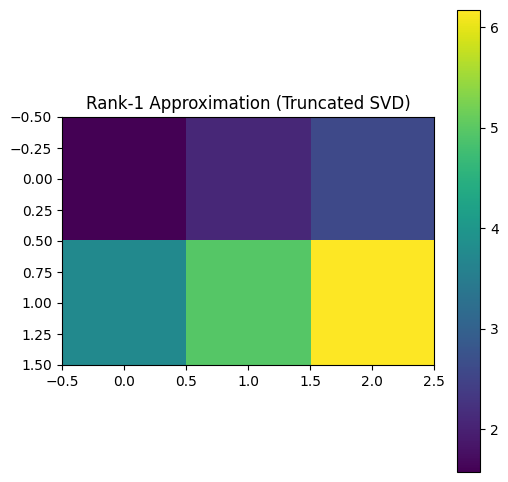

Truncated SVD components:
 [[3.67312108]
 [8.76988335]]
Approximated A:
 [[1.57 2.08 2.59]
 [3.76 4.97 6.17]]


In [2]:
# Truncated SVD Example
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Define matrix
A = np.array([[1, 2, 3], [4, 5, 6]])

# Truncated SVD
svd = TruncatedSVD(n_components=1)
A_reduced = svd.fit_transform(A)
A_approx = svd.inverse_transform(A_reduced)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.title('Original Matrix A')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(A_approx, cmap='viridis', interpolation='nearest')
plt.title('Rank-1 Approximation (Truncated SVD)')
plt.colorbar()
plt.show()

print('Truncated SVD components:\n', A_reduced)
print('Approximated A:\n', A_approx.round(2))

**Visualization Explanation**: The plots compare the original matrix with its rank-1 approximation, showing how truncated SVD captures the dominant structure with reduced dimensionality.

### 2.3 Frobenius Norm and SVD
**Definition**: The Frobenius norm is $\|\mathbf{A}\|_F = \sqrt{\sum_{i,j} a_{ij}^2} = \sqrt{\sum_i \sigma_i^2}$.

**Explanation**: SVD links the Frobenius norm to singular values, quantifying matrix size and approximation error.

**Derivation**: Since $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$ and $\mathbf{U}, \mathbf{V}$ are orthogonal, $\|\mathbf{A}\|_F^2 = \text{trace}(\mathbf{A}^T \mathbf{A}) = \sum_i \sigma_i^2$.

**Why Necessary**:
- Measures approximation error in truncated SVD.
- Quantifies matrix similarity in ML tasks.

**Example**: Compute $\|\mathbf{A}\|_F$ for $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$.

**ML Use-Case**: Matrix completion minimizes $\|\mathbf{A} - \mathbf{A}_k\|_F$.

In [3]:
# Frobenius Norm via SVD
import numpy as np

# Define matrix
A = np.array([[1, 2], [3, 4]])

# Compute Frobenius norm
frobenius_norm = np.linalg.norm(A, 'fro')
U, Sigma, Vt = np.linalg.svd(A)
frobenius_from_svd = np.sqrt(np.sum(Sigma**2))

print(f'Frobenius norm: {frobenius_norm:.2f}')
print(f'Frobenius norm via SVD: {frobenius_from_svd:.2f}')

Frobenius norm: 5.48
Frobenius norm via SVD: 5.48


### 2.4 Relationship to Eigenvalue Decomposition
**Definition**: For a square matrix, eigenvalue decomposition is $\mathbf{A} = \mathbf{P} \mathbf{D} \mathbf{P}^{-1}$, while SVD applies to any $m \times n$ matrix.

**Explanation**: For symmetric matrices, SVD and eigenvalue decomposition are related, but SVD is more general, handling rectangular or non-symmetric matrices.

**Derivation**: For symmetric $\mathbf{A}$, $\mathbf{A}^T \mathbf{A} = \mathbf{A}^2$, so SVD singular values are the absolute eigenvalues, and $\mathbf{U} = \mathbf{V}$ aligns with eigenvectors.

**Why Necessary**:
- Generalizes decomposition to rectangular matrices.
- Provides orthonormal bases for ML applications.

**Example**: Compare SVD and eigenvalue decomposition for a symmetric matrix.

**ML Use-Case**: PCA uses SVD for covariance matrix decomposition.

In [4]:
# SVD vs Eigenvalue Decomposition
import numpy as np

# Define symmetric matrix
A = np.array([[2, 1], [1, 2]])

# SVD
U, Sigma, Vt = np.linalg.svd(A)

# Eigenvalue decomposition
eigvals, eigvecs = np.linalg.eigh(A)

print('SVD singular values:', Sigma.round(2))
print('Eigenvalues:', eigvals.round(2))

SVD singular values: [3. 1.]
Eigenvalues: [1. 3.]


## Applications in AI/ML
SVD is applied in:
- **PCA**: Finds principal components.
- **Recommendation Systems**: Extracts latent factors.
- **Image Compression**: Reduces matrix rank.
- **LSA**: Uncovers topics in text.
- **Matrix Completion**: Reconstructs missing entries.
- **Spectral Clustering**: Projects data for clustering.

## Practical ML Examples
Below are coded examples demonstrating SVD in ML contexts, including a detailed linear regression example using SVD.

### Example 1: PCA with SVD (Dimensionality Reduction)
This example uses SVD to project data onto principal components.

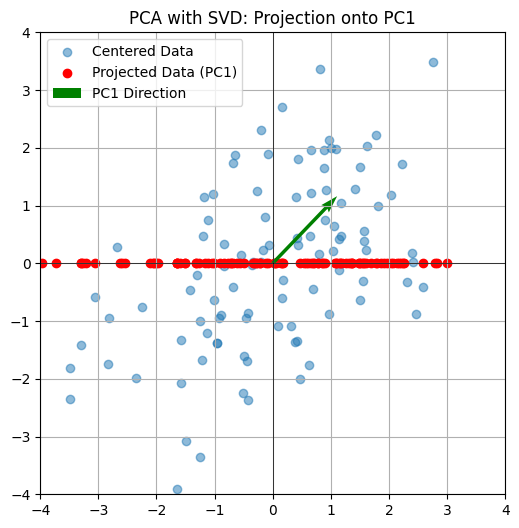

Top singular value: 17.7
Projected data (first few):
 [[-3.05]
 [-1.65]
 [-3.26]]


In [5]:
# PCA with SVD
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 100)

# Center data
centered_data = data - np.mean(data, axis=0)

# SVD
U, Sigma, Vt = np.linalg.svd(centered_data, full_matrices=False)
k = 1  # Top component
data_projected = centered_data @ Vt[:k].T

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5, label='Centered Data')
plt.scatter(data_projected, np.zeros_like(data_projected), color='red', label='Projected Data (PC1)')
plt.quiver(0, 0, Vt[0, 0], Vt[0, 1], color='green', scale=5, label='PC1 Direction')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('PCA with SVD: Projection onto PC1')
plt.legend()
plt.show()

print('Top singular value:', Sigma[0].round(2))
print('Projected data (first few):\n', data_projected[:3].round(2))

**Example Explanation**: This code performs PCA using SVD, projecting centered data onto the top singular vector (PC1). The visualization shows original data, projected points, and the principal direction.

### Example 2: Linear Regression with SVD (Projection onto Best Fit Line)
**Explanation**: Linear regression finds the best fit line $y = \beta_0 + \beta_1 x$ by projecting the target vector $\mathbf{y}$ onto the column space of the feature matrix $\mathbf{X}$ (including a column of ones for the intercept). SVD provides a numerically stable way to solve the normal equations, especially for ill-conditioned matrices. The projected points $\mathbf{y}_{\text{proj}} = \mathbf{X} \mathbf{\beta}$ lie on the best fit line, and residuals $\mathbf{e} = \mathbf{y} - \mathbf{y}_{\text{proj}}$ are orthogonal to the column space, minimizing the L2 norm $\|\mathbf{e}\|_2$.

**Formal Derivation**:
- Model: $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, where $\mathbf{y} = [y_1, \dots, y_n]^T$, $\mathbf{X} = [\mathbf{1}, \mathbf{x}]$, and $\mathbf{\beta} = [\beta_0, \beta_1]^T$.
- Goal: Minimize $\|\mathbf{y} - \mathbf{X} \mathbf{\beta}\|_2^2$.
- SVD of $\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, where $\mathbf{U}$ is $n \times n$, $\mathbf{\Sigma}$ is $n \times 2$, and $\mathbf{V}$ is $2 \times 2$ (for one feature plus intercept).
- Normal equations: $\mathbf{X}^T \mathbf{X} \mathbf{\beta} = \mathbf{X}^T \mathbf{y}$.
- Using SVD: $\mathbf{X}^T \mathbf{X} = \mathbf{V} \mathbf{\Sigma}^T \mathbf{\Sigma} \mathbf{V}^T$, so:
  $$
  \mathbf{\beta} = \mathbf{V} \mathbf{\Sigma}^+ \mathbf{U}^T \mathbf{y}
  $$
  where $\mathbf{\Sigma}^+$ is the pseudo-inverse of $\mathbf{\Sigma}$ (reciprocal of non-zero singular values).
- Projection: $\mathbf{y}_{\text{proj}} = \mathbf{X} \mathbf{\beta} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \mathbf{V} \mathbf{\Sigma}^+ \mathbf{U}^T \mathbf{y}$.
- Residuals: $\mathbf{e} = \mathbf{y} - \mathbf{y}_{\text{proj}}$, with $\|\mathbf{e}\|_2^2$ as the sum of squared errors (SSE).

**Why Necessary**:
- SVD provides a stable solution for ill-conditioned $\mathbf{X}^T \mathbf{X}$.
- The projection minimizes the L2 norm of residuals, ensuring the best fit line.
- Residuals are orthogonal to the column space, guaranteeing optimality.

**Solution for Errors**:
- Compute residuals and SSE.
- To reduce errors:
  - Add features (e.g., polynomial terms) to expand the column space.
  - Apply regularization (e.g., ridge regression via truncated SVD).
  - Remove outliers to reduce large residuals.
  - Use truncated SVD to ignore small singular values if noise is present.

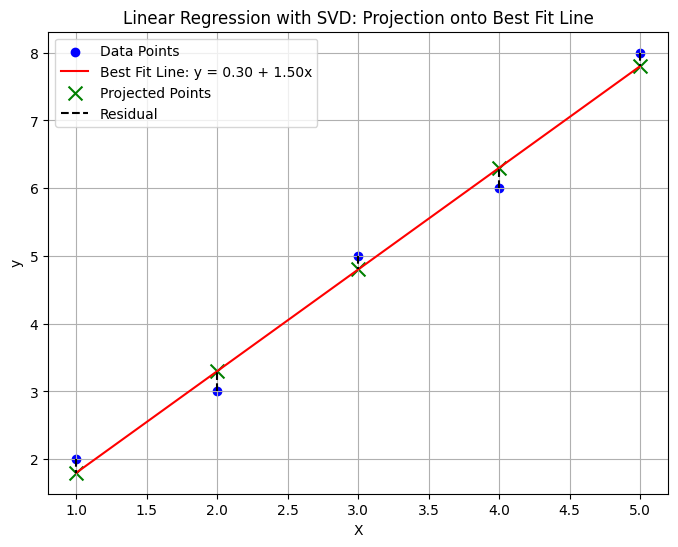

Coefficients: Intercept = 0.30, Slope = 1.50
Projected y (points on line): [1.8 3.3 4.8 6.3 7.8]
Residuals: [ 0.2 -0.3  0.2 -0.3  0.2]
Sum of squared errors (SSE): 0.30
L2 norm of residuals: 0.55


In [6]:
# Linear Regression with SVD
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
X = np.array([1, 2, 3, 4, 5])  # Feature values
y = np.array([2, 3, 5, 6, 8])  # Target values
X_matrix = np.vstack([np.ones(len(X)), X]).T  # Feature matrix with intercept

# SVD of X
U, Sigma, Vt = np.linalg.svd(X_matrix, full_matrices=False)

# Pseudo-inverse for coefficients
Sigma_inv = np.diag(1 / Sigma)  # Pseudo-inverse of Sigma
beta = Vt.T @ Sigma_inv @ U.T @ y  # beta = V * Sigma^+ * U^T * y
beta_0, beta_1 = beta

# Projection
y_proj = X_matrix @ beta

# Residuals
errors = y - y_proj
sse = np.sum(errors**2)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_proj, color='red', label=f'Best Fit Line: y = {beta_0:.2f} + {beta_1:.2f}x')
plt.scatter(X, y_proj, color='green', marker='x', s=100, label='Projected Points')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_proj[i]], 'k--', label='Residual' if i == 0 else None)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.title('Linear Regression with SVD: Projection onto Best Fit Line')
plt.legend()
plt.show()

print(f'Coefficients: Intercept = {beta_0:.2f}, Slope = {beta_1:.2f}')
print(f'Projected y (points on line): {y_proj.round(2)}')
print(f'Residuals: {errors.round(2)}')
print(f'Sum of squared errors (SSE): {sse:.2f}')
print(f'L2 norm of residuals: {np.linalg.norm(errors):.2f}')

**Example Explanation**: This code uses SVD to solve linear regression, projecting $\mathbf{y}$ onto the column space of $\mathbf{X}$. The visualization shows:
- Blue dots: Original data points $(x_i, y_i)$.
- Red line: Best fit line $y = \beta_0 + \beta_1 x$.
- Green crosses: Projected points $\mathbf{y}_{\text{proj}}$ on the line.
- Black dashed lines: Residuals $\mathbf{y} - \mathbf{y}_{\text{proj}}$, orthogonal to the column space.
The output includes coefficients, projected points, residuals, SSE, and the L2 norm of residuals. To reduce errors, consider adding features, regularization, or outlier removal.

## Summary
- **Key Concepts**: SVD decomposes matrices into orthogonal transformations and scalings, enabling low-rank approximations and feature extraction.
- **Mathematical Significance**: Provides rank analysis, geometric insights, and numerical stability.
- **AI/ML Relevance**: Supports dimensionality reduction, compression, and feature extraction.
- **Next Steps**: Practice computing SVD, applying it to ML tasks, and analyzing residuals.

## Tips and Practice
- **Visualize**: Use Matplotlib or GeoGebra (https://www.geogebra.org/) to visualize SVD components.
- **Practice Problems**:
  1. Compute SVD for $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ and reconstruct it.
  2. Perform truncated SVD ($k=1$) on a $3 \times 2$ matrix.
  3. Use SVD for linear regression on a small dataset and compute residuals.
  4. Apply SVD to a small image matrix for compression.
- **Project Idea**: Implement PCA or LSA on a dataset using SVD.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), scikit-learn SVD tutorials.

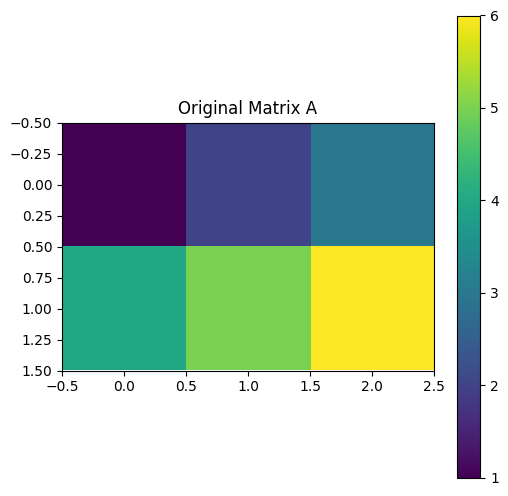

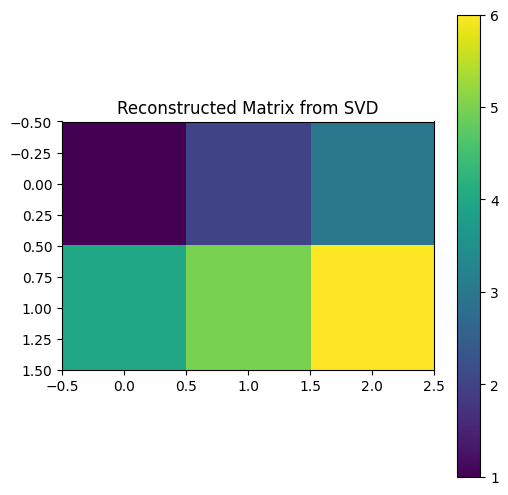

U:
 [[-0.39 -0.92]
 [-0.92  0.39]]
Singular values: [9.51 0.77]
V^T:
 [[-0.43 -0.57 -0.7 ]
 [ 0.81  0.11 -0.58]
 [ 0.41 -0.82  0.41]]
Reconstructed A:
 [[1. 2. 3.]
 [4. 5. 6.]]


In [7]:
# Experimentation Zone
# Try SVD on your own matrix!
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[1, 2, 3], [4, 5, 6]])

# Compute SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)
Sigma_mat = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
A_reconstructed = U @ Sigma_mat @ Vt

# Visualize
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.title('Original Matrix A')
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(A_reconstructed, cmap='viridis', interpolation='nearest')
plt.title('Reconstructed Matrix from SVD')
plt.colorbar()
plt.show()

print('U:\n', U.round(2))
print('Singular values:', Sigma.round(2))
print('V^T:\n', Vt.round(2))
print('Reconstructed A:\n', A_reconstructed.round(2))